##ThinkDSP

This notebook contains code examples from Chapter 11: Modulation and samplimg

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
import thinkdsp
import thinkplot

import numpy as np

%matplotlib inline

In [3]:
reload(thinkdsp)
wave = thinkdsp.read_wave('105977__wcfl10__favorite-station.wav')
wave.unbias()
wave.normalize()
wave.make_audio()

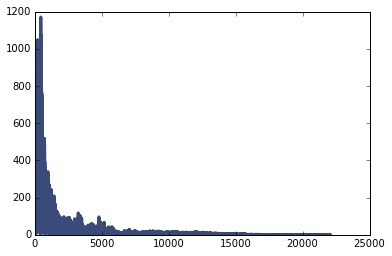

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()

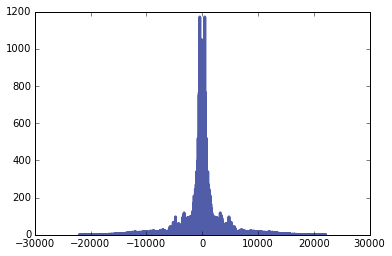

In [5]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

In [6]:
wave.duration

2.809614512471655

In [7]:
carrier_sig = thinkdsp.CosSignal(freq=10000)
carrier_wave = carrier_sig.make_wave(duration=wave.duration, framerate=wave.framerate)

In [8]:
modulated = wave * carrier_wave

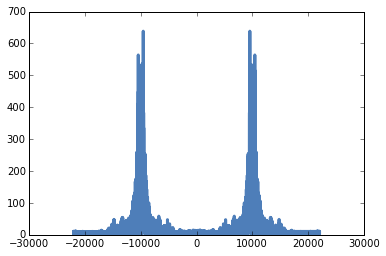

In [9]:
modulated.make_spectrum(full=True).plot()

In [10]:
modulated.make_audio()

In [11]:
demodulated = modulated * carrier_wave

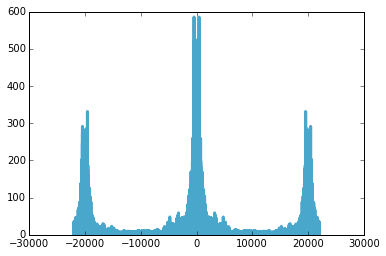

In [12]:
demodulated_spectrum = demodulated.make_spectrum(full=True)
demodulated_spectrum.plot()

In [13]:
demodulated.make_audio()

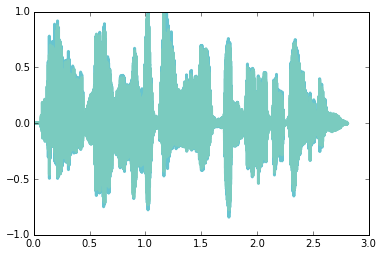

In [14]:
wave.plot()
demodulated.plot()

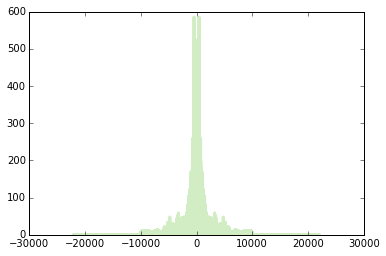

In [15]:
demodulated_spectrum.low_pass(10000)
demodulated_spectrum.plot()

In [16]:
filtered = demodulated_spectrum.make_wave()
filtered.make_audio()

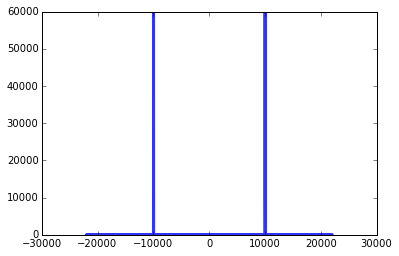

In [17]:
carrier_spectrum = carrier_wave.make_spectrum(full=True)
carrier_spectrum.plot()

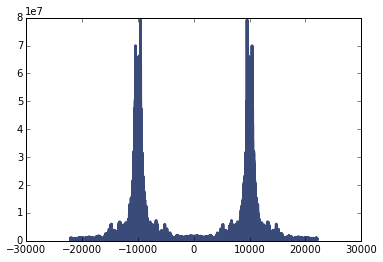

In [18]:
convolved = spectrum.convolve(carrier_spectrum)
convolved.plot()

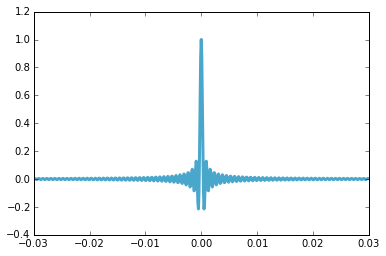

In [36]:
reload(thinkdsp)
sinc = thinkdsp.Sinc().make_wave(start=-0.03, duration=0.06, framerate=10000)
sinc.plot()

In [22]:
sinc.make_audio()

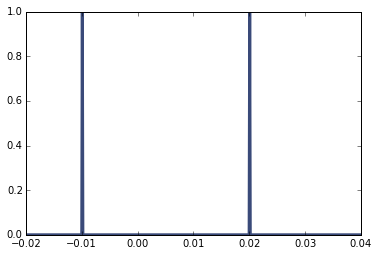

In [43]:
reload(thinkdsp)
impulses = thinkdsp.Impulses([-0.01, 0.02]).make_wave(start=-0.02, duration=0.06, framerate=10000)
impulses.plot()

In [52]:
roll = np.searchsorted(impulses.ts, 0)
print(roll, impulses.ys[roll])

(201, 0.0)


In [53]:
window = np.roll(impulses.ys, -roll)

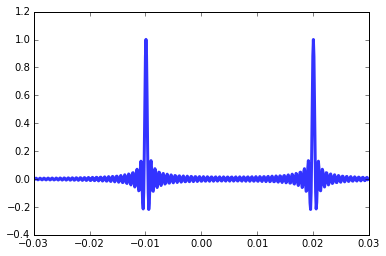

In [56]:
convolved = np.convolve(sinc.ys, window, mode='same')
thinkplot.plot(sinc.ts, convolved)